In [1]:
# importing libraries necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loadings saved features that was prepared in data preparation file

from pickle import load
# load train_diagnose
train_diagnose= load(open('train_diagnose.pkl', 'rb'))
# load the fa_feature_all_locations_without_Nan data
fa_feature_all_locations_without_Nan = load(open('fa_feature_all_locations_without_Nan.pkl', 'rb'))
# load the md_feature_all_locations_without_Nan data
md_feature_all_locations_without_Nan= load(open('md_feature_all_locations_without_Nan.pkl', 'rb'))

# load the rd_feature_all_locations_without_Nan data
rd_feature_all_locations_without_Nan= load(open('rd_feature_all_locations_without_Nan.pkl', 'rb'))
# load the ad_feature_all_locations_without_Nan data
ad_feature_all_locations_without_Nan= load(open('ad_feature_all_locations_without_Nan.pkl', 'rb'))

cl_feature_all_locations_without_Nan= load(open('cl_feature_all_locations_without_Nan.pkl', 'rb'))
# load curvature_feature_all_locations_without_Nan data
curvature_feature_all_locations_without_Nan= load(open('curvature_feature_all_locations_without_Nan.pkl', 'rb'))

# load the Torision data
Torsion_feature_all_locations_without_Nan = load(open('Torsion_feature_all_locations_without_Nan.pkl', 'rb'))
# load the volume data
volume_feature_all_locations_without_Nan= load(open('volume_feature_all_locations_without_Nan.pkl', 'rb'))


In [3]:
# correcting mistakes of not using replaced nan values 
combined_features_without_Scaling=np.concatenate((fa_feature_all_locations_without_Nan,md_feature_all_locations_without_Nan,rd_feature_all_locations_without_Nan, 
                        ad_feature_all_locations_without_Nan,cl_feature_all_locations_without_Nan,curvature_feature_all_locations_without_Nan,
                        Torsion_feature_all_locations_without_Nan,volume_feature_all_locations_without_Nan),axis=1)


In [4]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_without_Scaling,train_diagnose),axis=1)

In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


# AD vs Normal Control Training

In [7]:
# combining Ad vs Normal for classification
ADvsNC_X=np.concatenate((AD_data_x, NC_data_x), axis=0)
print(ADvsNC_X.shape)

ADvsNC_Y=np.concatenate((AD_data_y, NC_data_y), axis=0)
print(ADvsNC_Y.shape)

(485, 16000)
(485,)


In [8]:
# changing ad=1 and nc=0
where_3 = np.where(ADvsNC_Y== 3)
where_1 = np.where(ADvsNC_Y == 1)

ADvsNC_Y[where_3] = 1
ADvsNC_Y[where_1] = 0
ADvsNC_Y.shape


(485,)

In [9]:
# split data into training 70, validation10 and test sets20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNC_X, ADvsNC_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

In [10]:
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (349, 16000)
Alzheimer's diseas and Normal Validation shape : (39, 16000)
Alzheimer's diseas and Normal Test shape : (97, 16000)


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler =StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test))
print("Mean of test set: ",np.mean(X_test))



Alzheimer's diseas and Normal Train shape : (349, 16000)
Alzheimer's diseas and Normal Validation shape : (39, 16000)
Alzheimer's diseas and Normal Test shape : (97, 16000)
Std of test set :  0.270620484180649
Mean of test set:  0.4122653306433417


In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# intializing clasisfiers into teh classifier list.
classifiers = [
    SVC(random_state=25,probability=True,class_weight='balanced'),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]


# models columns name to save ths results into
models_cols=["Classifiers", "Accuracy","F1_score_NC", "F1_score_AD"]
models_df = pd.DataFrame(columns=models_cols)

# for loop through classifiers to fit the train set and  and test in on test set and appedning the result into model_df .
for models in classifiers:
#     fitting the trin set
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
#     
    print('****Results****')
#     applying it into test to measure the accuracy , f1_score.
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)

SVC
****Results****
Training 92.26%
Accuracy 77.32%
F1_Score of NC: 68.57%
F1_Score of AD: 82.26%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 55.67%
F1_Score of NC: 39.44%
F1_Score of AD: 65.04%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 61.86%
F1_Score of NC: 66.06%
F1_Score of AD: 56.47%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 72.16%
F1_Score of NC: 72.16%
F1_Score of AD: 72.16%
CPU times: user 1min 20s, sys: 2.65 s, total: 1min 22s
Wall time: 33 s


Text(0.5, 1.0, 'AUC score of AD vs Normal Control Before PCA of NC vs AD')

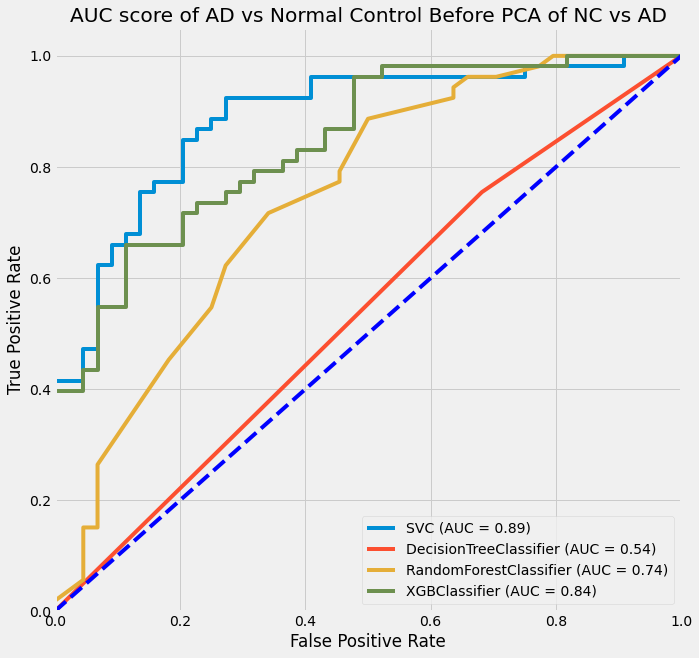

In [13]:
# plotting the ROC  before applying PCA
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control Before PCA of NC vs AD')

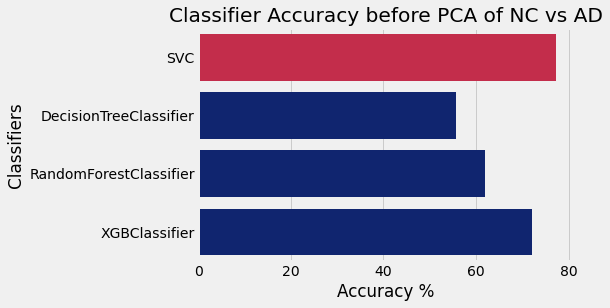

In [14]:
# plotting the accuracy score
import pandas as pd
from sklearn.decomposition import PCA
# custom color method to highlight the highest accuracy into other color.
def set_custom_palette(series, max_color = 'crimson', other_color = 'b'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'])
sns.barplot(x='Accuracy', y='Classifiers', data=models_df,palette=clrs, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy before PCA of NC vs AD')
plt.show()



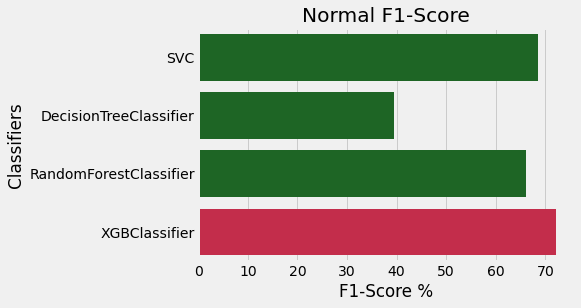

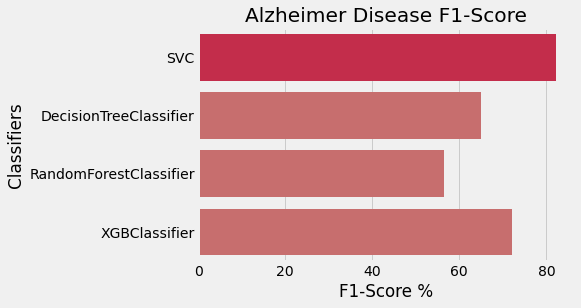

In [15]:
# plotting F1_score before applying  PCA

sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NC'],other_color = 'g')
sns.barplot(x='F1_score_NC', y='Classifiers', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],other_color = 'r')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()



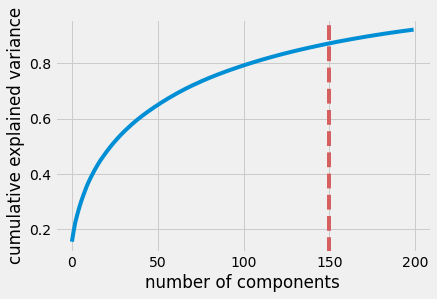

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.155502,0.155502
1,0.193390,0.037888
2,0.226151,0.032760
3,0.250267,0.024116
4,0.272595,0.022328
...,...,...
195,0.917575,0.000830
196,0.918402,0.000826
197,0.919220,0.000818
198,0.920036,0.000816


In [16]:
# plotting and testing pcA
pca_test = PCA(n_components=200)
pca_test.fit(X_train)

plt.style.use('fivethirtyeight')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=150, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(200))

In [17]:
from math import sqrt
# fitting Pca into training, test and validation set
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 150 components:", var_exp.sum())
# looing and comparing the mean and standar deviations before and aftet PcA 
# since the mean and standard deviation have increased and is not in range of 0 and 1.applying Sclaer again in teh enxt cell
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 150 components: 0.8686231040611843
std of test set AFTER PCA:  1.8238035761691782
mean of test set AFTER PCA:  0.03382005194650534
std of training set AFTER PCA:  1.3715103143271663
mean of training set AFTER PCA:  -2.6874395736485164e-17
std of test set BEFORE PCA::  0.270620484180649
mean of test set BEFORE PCA:  0.4122653306433417
std of training set BEFORE PCA::  0.270620484180649
mean of training set BEFORE PCA:  0.4122653306433417


In [18]:
from sklearn.preprocessing import StandardScaler
# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.2577477317393479
Mean of test set:  0.4827432773860222
Std of training set :  0.16779054199692106
Mean of training set:  0.45817055036412946


In [19]:
models_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    

    
    
    
print("="*30)

SVC
****Results****
Training 99.43%
Accuracy 67.01%
F1_Score of NC: 44.83%
F1_Score of AD: 76.47%
Sensitivity Score: 98.11%
Specificity Score: 29.55%
AUC Score: 84.99%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 45.36%
F1_Score of NC: 53.91%
F1_Score of AD: 32.91%
Sensitivity Score: 24.53%
Specificity Score: 70.45%
AUC Score: 47.49%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 68.04%
F1_Score of NC: 63.53%
F1_Score of AD: 71.56%
Sensitivity Score: 73.58%
Specificity Score: 61.36%
AUC Score: 70.45%
[18:07:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 73.20%
F1_Score of NC: 71.74%
F1_Score of AD: 74.51%
Sensitivity Score: 71.70%
Specificity Score: 75.00%
AUC Score: 82.33%


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER PCA of NC vs AD.')

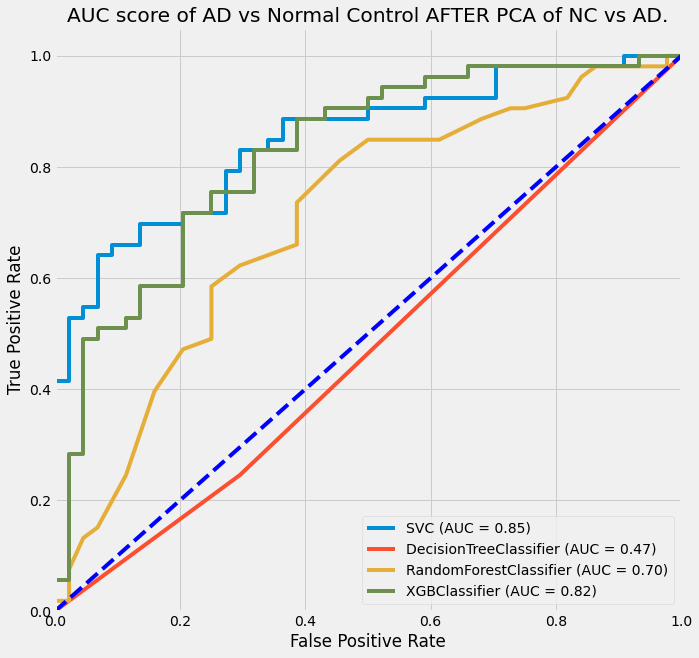

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER PCA of NC vs AD.')

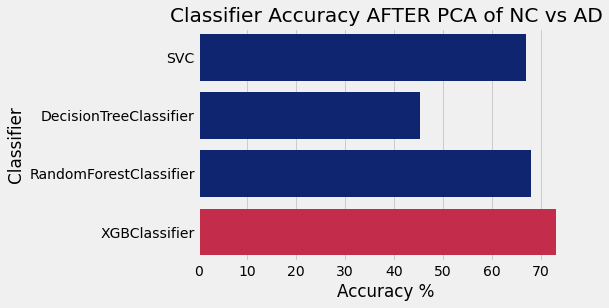

In [21]:



sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'])
sns.barplot(x='Accuracy', y='Classifier', data=models_df,palette=clrs, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA of NC vs AD')
plt.show()



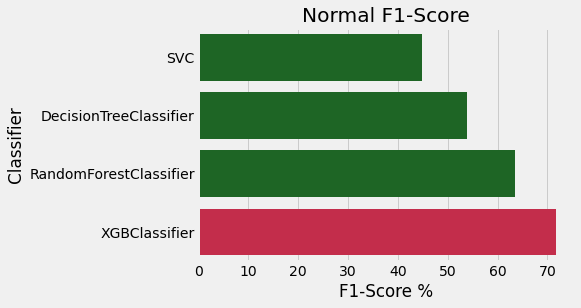

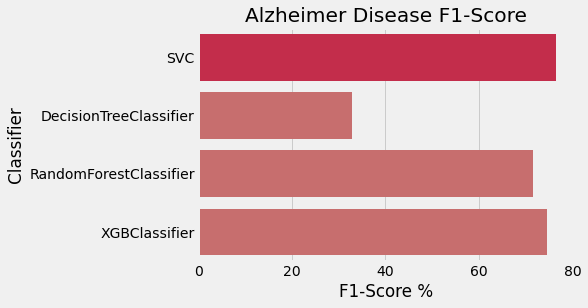

In [22]:
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NC'],other_color = 'g')
sns.barplot(x='F1_score_NC', y='Classifier', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],other_color = 'r')
sns.barplot(x='F1_score_AD', y='Classifier', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()



# AD Vs Normal Control HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [23]:
%%time

from sklearn.model_selection import PredefinedSplit,GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats


# Save mean cross-validated accuracy scores of best models
cross_valid_scores = {}
best_estimator_Score={}

parameters = {
    "C": [0.001, 0.01, 0.1, 1.0,1.4,1.5,2.0,2.4,3.0,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
    "probability":[True,False]
}

model_svc = SVC(
    random_state=25,

    
    
)

 

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
    return_train_score=True,
)


model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
       
)
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score( X_val_pca, y_val.ravel()))

    
cross_valid_scores['SVM Model'] = model_svc.best_score_
best_estimator_Score['SVM Model']=model_svc.best_estimator_.score( X_val_pca, y_val.ravel())
print('-----')




-----
Best parameters {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.739
Best estimator score on Validation set : 0.795
-----
CPU times: user 57.4 s, sys: 295 ms, total: 57.7 s
Wall time: 59 s


## Desicion Tree HYPERPARAMTER TUNNING

In [24]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "class_weight":["balanced",None],
    "min_samples_leaf":range(1,5)                   
}




model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score( X_val_pca, y_val))
cross_valid_scores['Desicion_Tree Model'] = model_desicion_tree.best_score_

best_estimator_Score['Desicion_Tree Model']=model_desicion_tree.best_estimator_.score( X_val_pca, y_val)
print('-----')

-----
Best parameters {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.728
Best estimator score on Validation set : 0.744
-----
CPU times: user 4min 15s, sys: 1.59 s, total: 4min 17s
Wall time: 4min 22s


# Random Forest HYPERPARAMTERER TUNNING

In [25]:
%%time

parameters = {
    "criterion":["gini","entropy"],
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
#     "bootstrap":[True,False],
    "class_weight":["balanced",None],
    "max_depth": [3, 5, 7, 9, 11, 13,None],
    
}

model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)

cross_valid_scores['Random_Forest'] = model_random_forest.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Random Forest Model']=model_random_forest.best_estimator_.score(X_val_pca, y_val)
print('-----')

-----
Best parameters {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 13, 'max_features': 9, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.679
Best estimator score on Validation set : 0.769
-----
CPU times: user 2min 38s, sys: 1.59 s, total: 2min 40s
Wall time: 2min 46s


# XGBOOST HYPERPARAMETER TUNNING

In [26]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['XGBOOST Model'] = model_xgb.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)
print('-----')






[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [27]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search ']).T

,Best Accuracy Through Grid Search
SVM Model,0.739006
Desicion_Tree Model,0.727867
Random_Forest,0.678841
XGBOOST Model,0.742360


In [28]:
pd.DataFrame(best_estimator_Score, index=['Best Estimator Score on Validation Set']).T

,Best Estimator Score on Validation Set
SVM Model,0.794872
Desicion_Tree Model,0.743590
Random Forest Model,0.769231
XG-Boost Model,0.717949


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [29]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)



(388, 150)
(388,)
(97, 150)


In [30]:
# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(
        **model_xgb.best_params_)



In [31]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
# classfiers obtained from hyperparatmeter with tehe ebst parameters
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# finalClassifiers = [model_svc.best_params_, model_random_forest.best_params_, model_desicion_tree.best_params_,model_xgb.best_params_]
# craeting new df to save the result of traning and testing
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)
# for loop that iterates over each name, model in models list
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens,spec,auc]], columns=final_cols)
    final = final.append(final_entry )
    
print("="*30)

final

SVC
****Results****
Training 94.07%
Accuracy 77.32%
F1_Score of NC: 75.56%
F1_Score of AD: 78.85%
Sensitivity Score: 77.36%
Specificity Score: 77.27%
AUC Score: 84.86%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 69.07%
F1_Score of NC: 61.54%
F1_Score of AD: 74.14%
Sensitivity Score: 81.13%
Specificity Score: 54.55%
AUC Score: 72.56%
DecisionTreeClassifier
****Results****
Training 83.25%
Accuracy 69.07%
F1_Score of NC: 71.70%
F1_Score of AD: 65.91%
Sensitivity Score: 54.72%
Specificity Score: 86.36%
AUC Score: 74.12%
[18:15:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 78.35%
F1_Score of NC: 77.42%
F1_Score of AD: 79.21%
Sensitivity Score: 75.47%
Specificity Score: 81.82%
AUC Score: 82.

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,69.072165,61.538462,74.137931,0.811321,0.545455,0.725557
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,78.350515,77.419355,79.207921,0.754717,0.818182,0.823756


In [32]:
# comparing the modes with default paramaeters 
models_df 

,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,67.010309,44.827586,76.470588,0.981132,0.295455,0.849914
0,DecisionTreeClassifier,45.360825,53.913043,32.911392,0.245283,0.704545,0.474914
0,RandomForestClassifier,68.041237,63.529412,71.559633,0.735849,0.613636,0.704545
0,XGBClassifier,73.195876,71.739130,74.509804,0.716981,0.750000,0.823328


In [33]:
# and hyperparamter tuning parameters since XGBosst got higher accauracy  withd default parameters repalcing that final xg with default paramaters.
final

,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,69.072165,61.538462,74.137931,0.811321,0.545455,0.725557
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,78.350515,77.419355,79.207921,0.754717,0.818182,0.823756


In [34]:
# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_
)

# Applying the default paramaeters since it gave the best result
xgb_final =  XGBClassifier(random_state=25)

# classfiers obtained from hyperparatmeter with tehe ebst parameters
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# finalClassifiers = [model_svc.best_params_, model_random_forest.best_params_, model_desicion_tree.best_params_,model_xgb.best_params_]
# craeting new df to save the result of traning and testing
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)
# for loop that iterates over each name, model in models list
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens,spec,auc]], columns=final_cols)
    final = final.append(final_entry )
    
print("="*30)

final

SVC
****Results****
Training 94.07%
Accuracy 77.32%
F1_Score of NC: 75.56%
F1_Score of AD: 78.85%
Sensitivity Score: 77.36%
Specificity Score: 77.27%
AUC Score: 84.86%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 68.04%
F1_Score of NC: 60.76%
F1_Score of AD: 73.04%
Sensitivity Score: 79.25%
Specificity Score: 54.55%
AUC Score: 73.18%
DecisionTreeClassifier
****Results****
Training 83.25%
Accuracy 69.07%
F1_Score of NC: 71.70%
F1_Score of AD: 65.91%
Sensitivity Score: 54.72%
Specificity Score: 86.36%
AUC Score: 74.12%
[18:15:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 79.38%
F1_Score of NC: 76.74%
F1_Score of AD: 81.48%
Sensitivity Score: 83.02%
Specificity Score: 75.00%
AUC Score: 84.

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,68.041237,60.759494,73.043478,0.792453,0.545455,0.731775
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,79.381443,76.744186,81.481481,0.830189,0.750000,0.841767


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER Hyper-Parameter Tunning of NC vs AD')

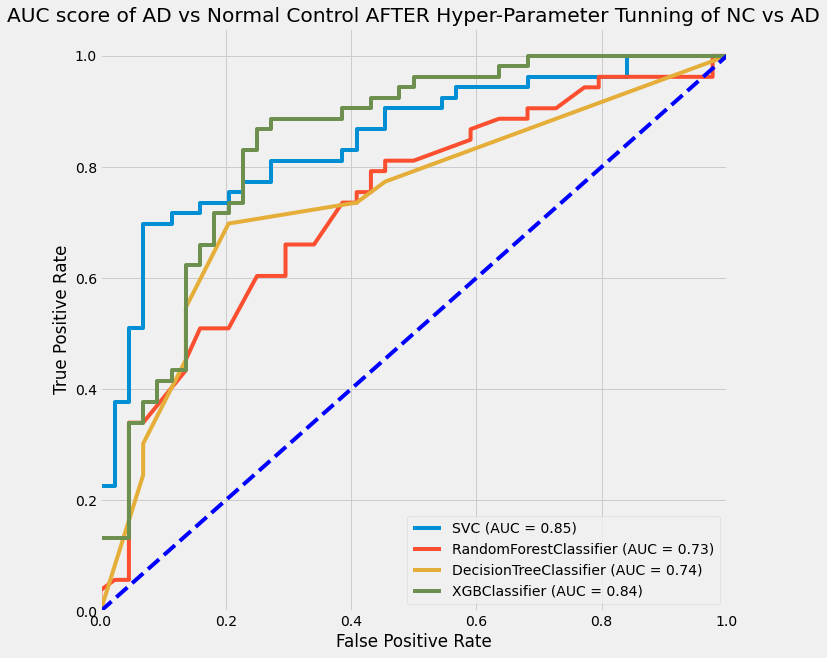

In [35]:
plt.style.use('fivethirtyeight')
# plotting Auc curve for Ad vs Normal control by using plot_roc_curve from sklearn libarary 
plt.figure(figsize=(10,10))    
ax = plt.gca()
# loop through classifiers and plot auc curve for each model
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER Hyper-Parameter Tunning of NC vs AD')



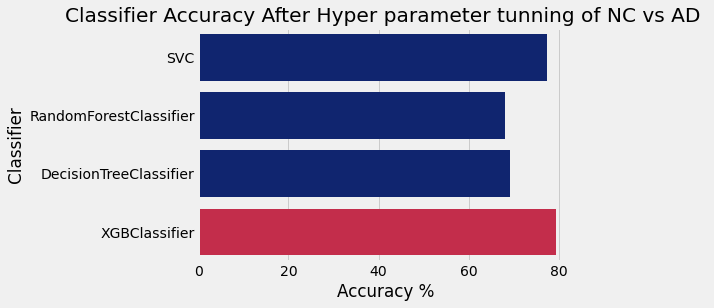

In [36]:
# bar plot for teh accuarcy of ecah classifiers
sns.set_color_codes("dark")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning of NC vs AD ')
plt.show()



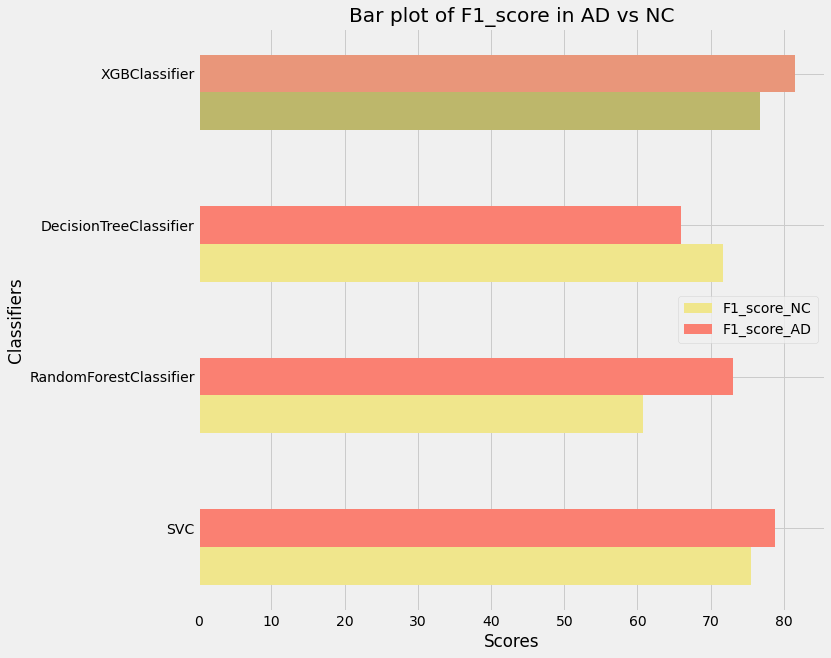

In [37]:

# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
f1_nc = final["F1_score_NC"]
f1_ad = final["F1_score_AD"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_nc)) else 'darkkhaki' for x in f1_nc ]
plt.barh(X, f1_nc, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_ad)) else 'darksalmon' for x in f1_ad]
plt.barh(X + 0.25, f1_ad, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_NC', 'F1_score_AD'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score in AD vs NC")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')

plt.show()

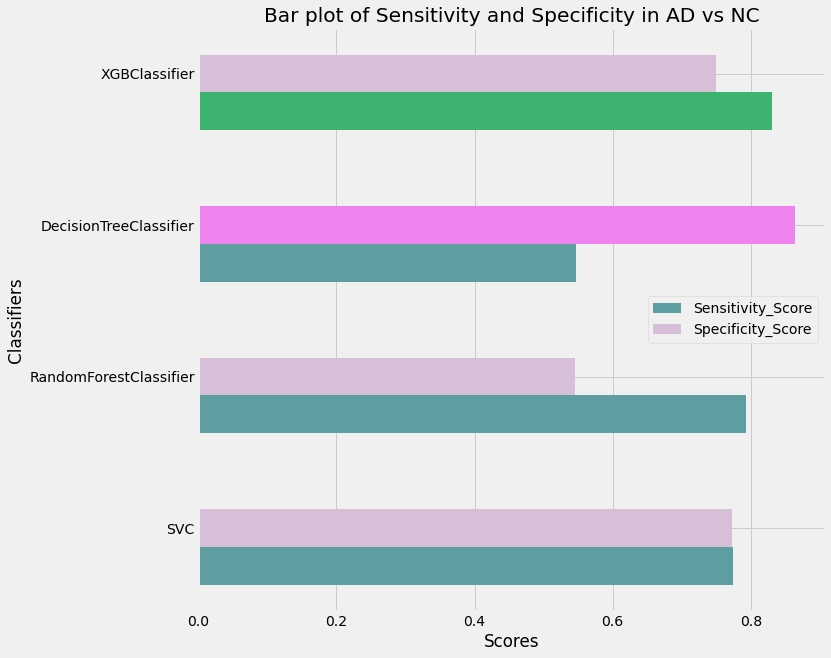

In [38]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'violet' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in AD vs NC")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')

plt.show()